In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from keras.utils import to_categorical # used for converting labels to one-hot-encoding
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
skin_df = pd.read_csv('HAM10000_metadata.csv')

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [4]:
SIZE= 32

In [5]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [6]:
skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))

        lesion_id      image_id     dx    dx_type   age     sex  \
2400  HAM_0006852  ISIC_0032715   vasc  consensus  45.0  female   
9949  HAM_0002551  ISIC_0024539  akiec      histo  70.0    male   
2595  HAM_0004873  ISIC_0029020    bcc      histo  50.0    male   
6766  HAM_0004267  ISIC_0028430     nv      histo  45.0  female   
8510  HAM_0006408  ISIC_0025198     nv      histo  35.0  female   
2745  HAM_0000512  ISIC_0030528    bcc      histo  45.0  female   
430   HAM_0005935  ISIC_0028254    bkl      histo  70.0  female   
3688  HAM_0007104  ISIC_0032133     nv  follow_up  30.0    male   
6088  HAM_0006784  ISIC_0025486     nv  follow_up  50.0  female   
7440  HAM_0000747  ISIC_0034319     nv      histo  30.0    male   

         localization  label  
2400          abdomen      6  
9949             face      0  
2595             back      1  
6766  lower extremity      5  
8510          abdomen      5  
2745             face      1  
430             chest      2  
3688          

C:\Users\saroj\AppData\Local\Temp\ipykernel_2328\3885637716.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


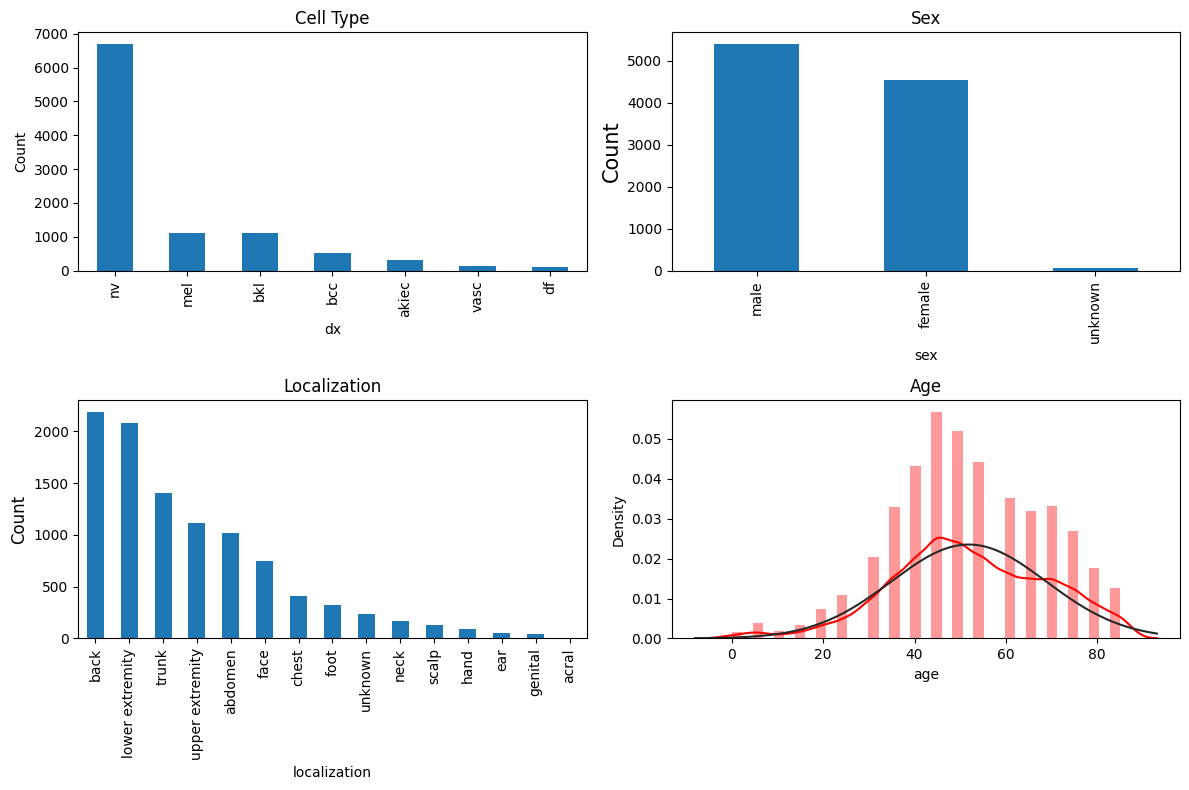

In [7]:
# Data distribution visualization
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [8]:
# Distribution of data into various classes
from sklearn.utils import resample
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [9]:
#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [10]:
n_samples=1000
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [11]:

#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [12]:
#Check the distribution. All classes should be balanced now.
print(skin_df_balanced['label'].value_counts())


label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
Name: count, dtype: int64


C:\Users\saroj\AppData\Local\Temp\ipykernel_2328\487760389.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_age = skin_df_balanced[pd.notnull(skin_df['age'])]
C:\Users\saroj\AppData\Local\Temp\ipykernel_2328\487760389.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


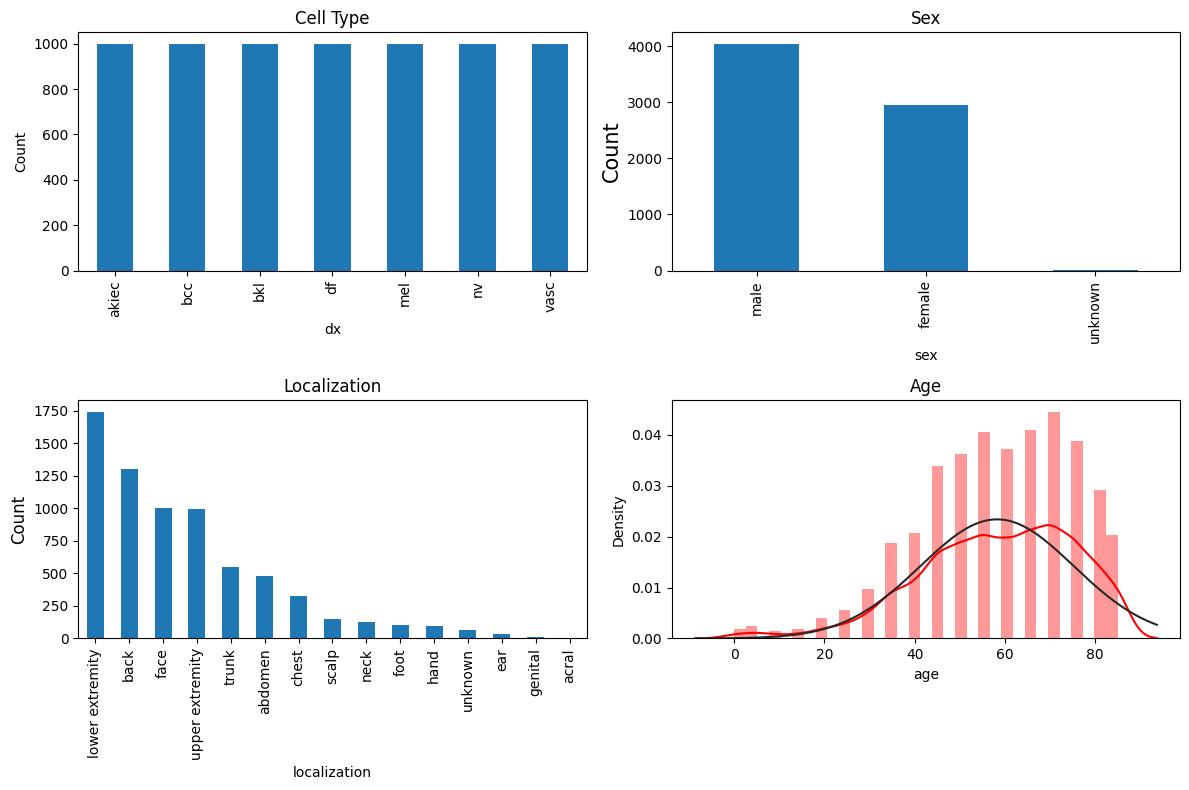

In [13]:
# Data distribution visualization balanced
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
skin_df_balanced['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df_balanced['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df_balanced['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df_balanced[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [14]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('data/HAM10000/', '*', '*.jpg'))}

In [ ]:
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [26]:
image_folder = '/HAM10000_combined/'

In [27]:
# Create a dictionary to map image IDs to their paths
image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(image_folder, '*.jpg'))}


In [28]:

# Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [30]:
# Check for any missing paths
missing_paths = skin_df_balanced['path'].isnull().sum()
if missing_paths > 0:
    print(f"Warning: {missing_paths} image paths are missing.")

# Use the path to read images, with error handling
SIZE = 224  # Define the size to which images should be resized
def load_image(path):
    try:
        return np.asarray(Image.open(path).resize((SIZE, SIZE)))
    except Exception as e:
        print(f"Error loading image {path}: {e}")
        return None

skin_df_balanced['image'] = skin_df_balanced['path'].map(load_image)

Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has no attribute 'read'
Error loading image None: 'NoneType' object has 